In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest 
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("./wrangled/sunAndRain.csv")

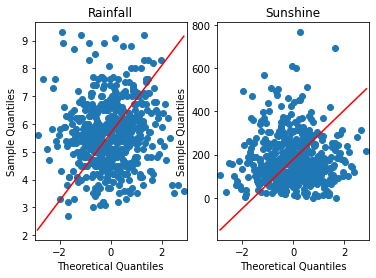

In [20]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)

ax1.set_title("Rainfall")
ax2.set_title("Sunshine")

sm.qqplot(data=df[["mean_sunshine_hrs"]].values,line="s",ax=ax1)
sm.qqplot(data=df[["total_rainfall"]].values,line="s",ax=ax2)

plt.show()

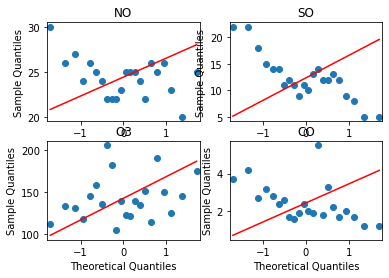

In [43]:
# test normality to see if can do hypothesis testing but cannot
fig,ax = plt.subplots(nrows=2, ncols=2)
df2 = pd.read_csv("./wrangled/pollution.csv")
ax[1][1].set_title("CO")
ax[0][1].set_title("SO")
ax[0][0].set_title("NO")
ax[1][0].set_title("O3")

sm.qqplot(data=df2[["co_max_8hour_mean"]].values,line="s",ax=ax[1][1])
sm.qqplot(data=df2[["sulphur_dioxide_mean"]].values,line="s",ax=ax[0][1])
sm.qqplot(data=df2[["nitrogen_dioxide_mean"]].values,line="s",ax=ax[0][0])
sm.qqplot(data=df2[["ozone_maximum_8hour_mean"]].values,line="s",ax=ax[1][0])

plt.show()

In [56]:
# test normality to see if can do hypothesis testing but cannot
#multivariate

model = IsolationForest(contamination=0.1)
model.fit(df[["mean_sunshine_hrs"]].values) # used .values to get rid of a warning
df["SunAnomalie"] = model.predict(df[["mean_sunshine_hrs"]].values)
model.fit(df[["total_rainfall"]].values) 
df["RainAnomalie"] = model.predict(df[["total_rainfall"]].values)
df

,Unnamed: 0,month,mean_sunshine_hrs,total_rainfall,SunAnomalie,RainAnomalie,year
0,0,1982-01,5.6,107.1,1,1,1982
1,1,1982-02,7.6,27.8,1,-1,1982
2,2,1982-03,5.1,160.8,1,1,1982
3,3,1982-04,4.7,157.0,1,1,1982
4,4,1982-05,5.8,102.2,1,1,1982
...,...,...,...,...,...,...,...
487,487,2022-08,5.5,141.4,1,1,2022
488,488,2022-09,3.8,121.0,1,1,2022
489,489,2022-10,3.5,279.0,-1,1,2022
490,490,2022-11,3.8,313.8,1,1,2022


In [57]:
df['year'] = pd.to_datetime(df['month']).dt.year

#new = df[df['total_rainfall'] == 'yes'].groupby(['month']).size().reset_index(name='count') i can do this way oso but its longer
newRain = df.groupby(['year'])['RainAnomalie'].agg(lambda x: (x != 1).sum())
newSun = df.groupby(['year'])['SunAnomalie'].agg(lambda x: (x != 1).sum())
type(newRain)

pandas.core.series.Series

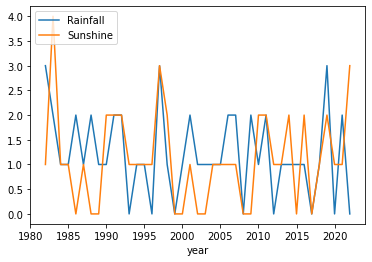

In [58]:
#plt.plot( 'x_values', 'y1_values', data=newRain, marker='o', color='skyblue', linewidth=4)
#plt.plot( 'x_values', 'y2_values', data=newSun, marker='', color='olive', linewidth=2)
newRain.plot(kind="line",label="Rainfall")
newSun.plot(kind="line",label="Sunshine")
plt.legend(loc="upper left")
plt.show()

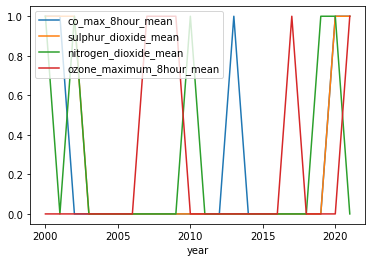

In [59]:
cols = ["co_max_8hour_mean","sulphur_dioxide_mean","nitrogen_dioxide_mean","ozone_maximum_8hour_mean"]
for i in cols:
    model = IsolationForest(contamination=0.2)
    model.fit(df2[[i]].values) # used .values to get rid of a warning
    df2["anormalie"+i] = model.predict(df2[[i]].values)
    newRain = df2.groupby(['year'])["anormalie"+i].agg(lambda x: (x != 1).sum())
    newRain.plot(kind="line", label=i)

plt.legend(loc="upper left")
plt.show()